# <center><u><font size = "6" face = "Georgia" color=770707>Description of Wave function of Hydrogen Atom</u></font></center>

<center><font size='5' face ="georgia" color= 098D58>Suryadeep Sur, 21CY40051<br>Department of Chemistry<br>Indian Institute of Technology, Kharagpur</font></center>

---


<br>
<br>




# **<font face = "Georgia" color=330066> 📗 Objective ::</font>**

<br>

<font face = "Georgia">This project explores the scope of application of python programming for visualization of Quantum mechanical model of Hydrogen atom. solve of schrodinger equation for hydrogen atom is tedious but the expression of  wavefunction which we get after the solution is not very straight forward either and it requires more calculation to convert it in a simple form. Our program will use the library functions like Legendre and laguerre polynomial to generate the plots which provides various information about the H-atom and similiar systems.</font>

# **<font face = "Georgia" color=330066> 📗 Background Theory ::</font>**

<br>

### **<font face = "Georgia">Schrodinger Equation in Spherical Coordinates**

---

Instead of locating a point in space by specifying the cartesian coordinates x, y,and z, we can equally well locate the same point by specifying the spherical coordinates$r, \theta,\phi $. From the Figure , we can see that the relations between the two sets of coordinates are given by

$$x=r\sin(\theta)\cos(\phi)\\y=r\sin(\theta)\sin(\phi)\\z=r\cos(\theta)$$

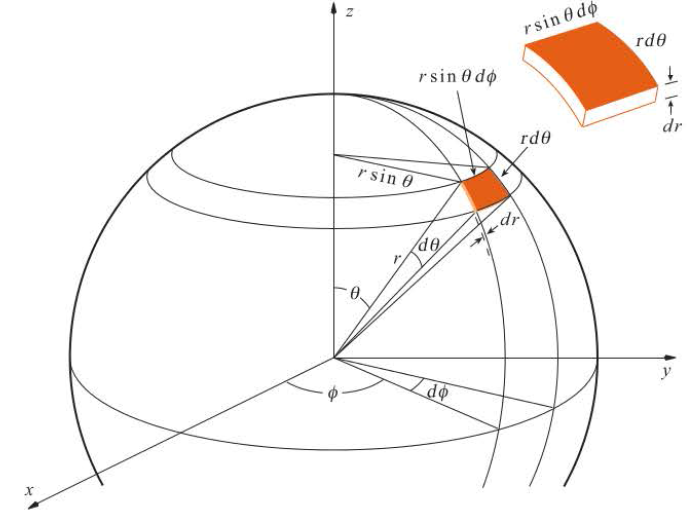

Occasionally, we need to know $r, \theta,\phi$ in terms of x, y, and z. These relations are given by
$$r=\sqrt{x^2+y^2+z^2}\\ \theta=\arccos\bigg(\frac{z}{\sqrt{x^2+y^2+z^2}}\bigg)\\ \phi=\arctan\bigg(\frac{y}{x}\bigg)$$

laplacian operator in polar coordinates is given by,

$$\nabla^2=\frac{1}{r^2}\frac{\partial}{\partial r}\bigg(r^2 \frac{\partial}{ \partial r}\bigg)+\frac{1}{r^2\sin\theta}\frac{\partial}{\partial \theta}\bigg(\sin\theta \frac{\partial}{ \partial \theta}\bigg)+\frac{1}{r^2\sin^2\theta}\bigg( \frac{\partial^2}{ \partial \phi^2}\bigg)$$

for hydrogen atom potential energy is given by columbs law as,

$$V=-\frac{e^2}{4\pi\epsilon_0 r}$$

Now we can write the Hamiltonian as

$$\hat{H}= -\frac{\hbar^2}{2m}\nabla^2- \frac{e^2}{4\pi\epsilon_0 r}$$

Schrodinger equation is given as,

$$\hat{H}\psi=E\psi$$



### **<font face = "Georgia">Solution of Schrodinger Equation for H-atom**

---

If we want to solve the schrodinger equation for hydrogen we must consider the wavefunction as a product of three functions. so we can write,

$$\psi= R_{n,l}(r)\Theta_{m,l}(\theta)\Phi_m(\phi)$$

$R_{n,l}(r)$ is the radial part of the wavefunction, $\Theta_{m,l}(\theta)$ is the angular part and $\Phi_m(\phi)$ is the azimuthal part. Here $n,l,m$ are the principal quantum number, azimuthal quantum number and magnetic quantum number respectively.

spherical harmonics can be defined as,

$$Y^m_l=\Theta_{m,l}(\theta)\Phi_m(\phi)$$

---
**Solve of radial part:**

$$R_{n,l}(r)= \sqrt{\bigg\{\frac{(n-l-1)!}{2n[(n+l)!]^3}\bigg\} \bigg( \frac{2}{na_0}\bigg)^{l+3}} \rho^l e^{-\rho /2} L_{n+l}^{2l+1}$$

here,
$$\rho=\bigg(\frac{2}{na_0}\bigg)r$$ 
$L_{n+l}^{2l+1}$ is the Laguerre polynomial which is given by,

$$L_{n+l}^{2l+1}= \frac{d^{2l+1}}{d \rho^{2l+1}} L_{n+l} \quad \text{here $L_{n+l}$ is associated Laguerre Polynomial}$$

$$L_{n+l}= e^\rho \frac{d^{n+l}}{d \rho^{n+l}} (\rho^{n+l} e^{- \rho})$$

---
**Solve of angular part:**

$$\Theta_{ml}(\theta)= \sqrt{\frac{(2l+1)(l-|m|)!}{2[(l+|m|)!]}} P^{|m|}_l$$

$P^{|m|}_l$ is the Legendre polynomial which is defined as,

$$P^{|m|}_l= (1-\xi^2)^{|m|/2} \frac{d^{|m|}}{d \xi^{|m|}}P_l \quad \text{here $P_l$ is associated Legendre polynomial}$$

$$P_l= \frac{1}{2^ll!} \frac{d^l}{d \xi^l}(\xi^2-1)^l$$

$$\xi=\cos\theta$$

---
**Solve of azimuthal part:**

$$\Phi_m(\phi)=\frac{1}{\sqrt{2\pi}}e^{im\phi}$$

<br>

<br>
<br>
<br>
<br>
<br>
<br><br><br><br>

# **<font face=Georgia color=330066> 📗 Section 1::</font><font face=Garamond color=00CC66> Radial Part</font>**
<br>


**Program-1 :: Definition of Radial part $R_{n,l}(r)$**

---

In [5]:
from scipy.special import genlaguerre
from math import factorial, pi, cos
import numpy as np

n,l=3,1                                                                         # change these quntum numbers for different results

def R(r):                                                                       # Function for radial part
  #definition of paramaters
  rho= 2.*r/(n)
  lp= genlaguerre(n-l-1,2*l+1)(rho)                                             #genlaguerre is used to generate Laguerre polynomial
  N= np.sqrt(((2./n)**3)*(factorial(n-l-1)/(2*n*factorial(n+l))))               #normalisation constant

  f= N*np.exp(-rho/2.)*(rho**l)*lp
  f= np.nan_to_num(f)                                                           #nan_to_num replaces None values if any with numbers
  return f

**Program 2:: Plot of Radial Distribution function**

---

Text(0, 0.5, '$R(r)$')

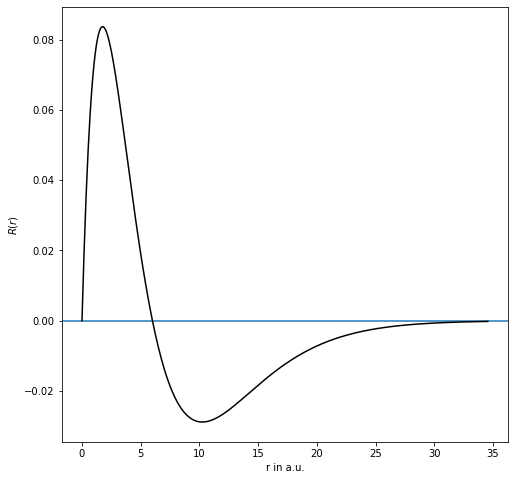

In [6]:
import matplotlib.pyplot as plt
# cartesian coordinates
d=0.05
maxr=20

x = np.arange(0,maxr,d)
y = np.arange(0,maxr,d)
z = np.arange(0,maxr,d)

# cartesian to polar
r=np.sqrt(x**2+y**2+z**2)

R1=R(r)                                                                        #wavefunction
plt.figure(figsize=(8,8))
plt.axhline(y=0)
plt.plot(r,R1,'k')
plt.xlabel("r in a.u.")
plt.ylabel("$R(r)$")


**program 3:: Location of Radial nodes**

---

Position of First Node:: 10.05 a.u


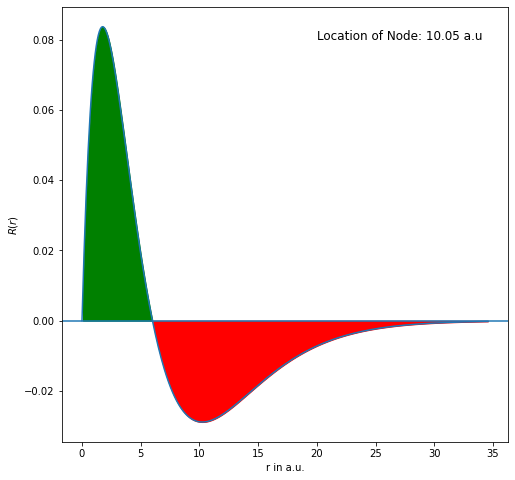

In [7]:
from scipy.optimize import root_scalar
nodes=n-l-1
if nodes==0:
  print("There is no Node")
else:
  R1=R(r)                                                                        #wavefunction
  a1=root_scalar(R,method='secant',x0=9,x1=10,xtol=(1e-06))                       #change x0 and x1 (initial approximation) according to the previous plot
  print("Position of First Node::",a1.root.round(2),"a.u")
  #a2=root_scalar(R,method='secant',x0=4,x1=5,xtol=(1e-06))
  #print("Position of Second Node::",a2.root.round(2),"a.u")

  plt.figure(figsize=(8,8))
  plt.axhline(y=0)
  plt.plot(r,R1)
  plt.xlabel("r in a.u.")
  plt.ylabel("$R(r)$")
  
  plt.text(20,0.08, 'Location of Node: '+str(a1.root.round(2))+" a.u", fontsize = 12)

  plt.fill_between(r,R1,where=(0<R1),color='green')                        #changes the color of area under the curve according to the phase
  plt.fill_between(r,R1,where=(0>R1),color="red")

<br>
<br>
<br>
<br>


**program 3:: Plot of probabilitiy distibution**

---

Text(0, 0.5, '$R^2(r)$')

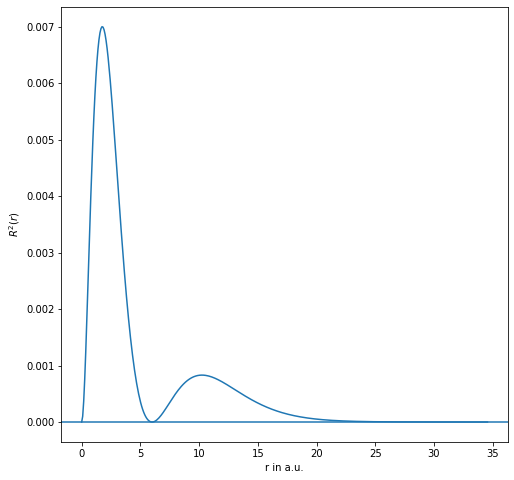

In [8]:
R2=(R(r))**2

plt.figure(figsize=(8,8))
plt.plot(r,R2)
plt.axhline(y=0)

plt.xlabel("r in a.u.")
plt.ylabel("$R^2(r)$")

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br><br><br><br><br>


**program 4:: Radial Distribution Function**

---

Text(0, 0.5, '$r^2R^2(r)$')

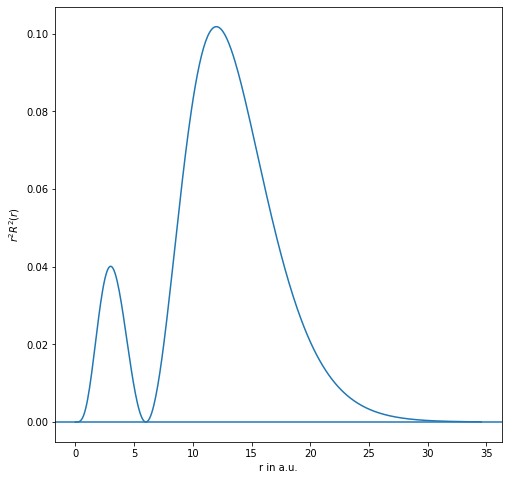

In [9]:
p=(r**2*(R(r))**2)
plt.figure(figsize=(8,8))
plt.plot(r,p)
plt.axhline(y=0)
plt.xlabel("r in a.u.")
plt.ylabel("$r^2R^2(r)$")

# **<font face=Georgia color=330066>📗 Section 2::</font><font face=Garamond color=00CC66> Angular Part</font>**
<br>


**program 5:: Definition of Angular Part $\Theta_{m,l}(\theta)$**

---

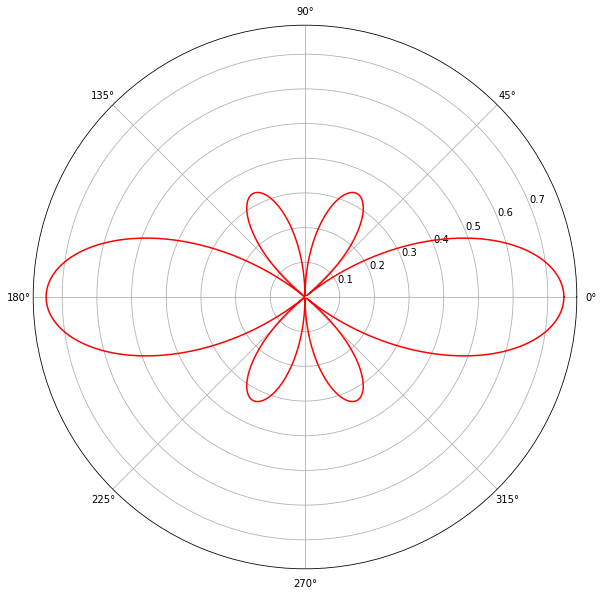

In [10]:
import numpy as np
from scipy.special import lpmv
import matplotlib.pyplot as plt
from math import factorial,pi

#defintion of parameter
theta = np.linspace(0,2*np.pi,500)

l,m=3,0                                                                         #change these quantum numbers to visualize different orbitals 

N= ((-1)**m)*(np.sqrt((2*l+1)*factorial(l-m)/(4*pi*factorial(l+m))))            #normalization constant
r = N*lpmv(m,l,np.cos(theta))                                                   #lpmv is used to generate differant legendre polynomial

plt.figure(figsize=(10,10))
plt.polar(theta,abs(r),'r')                                                         #plot in the polar coordinate 
plt.show()


**program 6:: Collection of Angular parts**

---

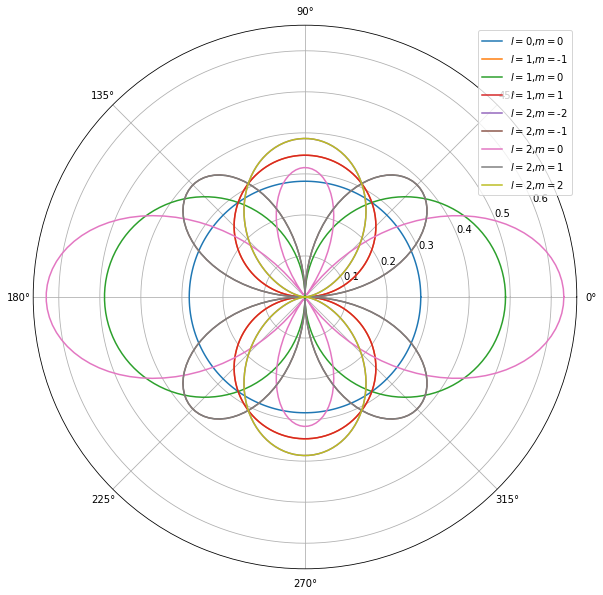

In [11]:
import numpy as np
from scipy.special import lpmv
import matplotlib.pyplot as plt

lmax=2
theta = np.linspace(0,2*np.pi,200)

plt.figure(figsize=(10,10))

for l in range(lmax+1):
    for m in range(-l,l+1):
      N= ((-1)**m)*(np.sqrt((2*l+1)*factorial(l-m)/(4*pi*factorial(l+m))))
      r = N*lpmv(m,l,np.cos(theta))
      plt.polar(theta, abs(r),label=r'$l=$'+str(l)+',$m=$'+str(m))

plt.legend()
plt.show()

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

# **<font face=Georgia color=330066>📗 Section 3 ::</font><font face=Garamond color=00CC66> Spherical Harmonics</font>**
<br>


**program 6:: Defintion of spherical  Harmonics $Y^m_l=\Theta_{ml}(\theta)\Phi_m(\phi)$**

---

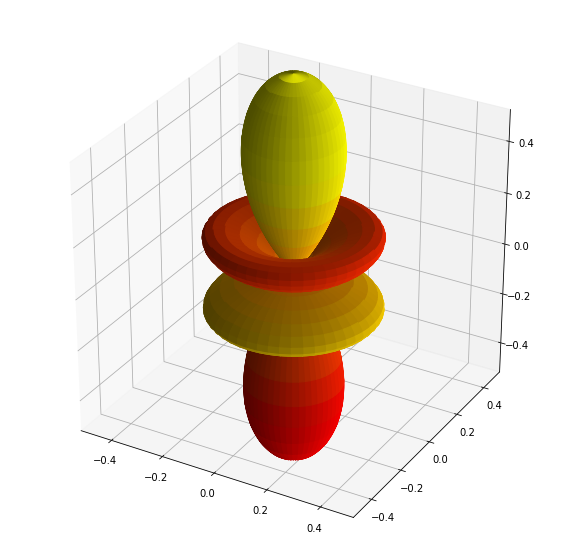

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm

def plotY(ax, l, m,xyz):                                                        #this function plots spherical harmonics
  Y = sph_harm(abs(m), l, phi, theta)                                           #sph_harm is used to generate spherical harmonincs

  if m<0:                                                                       # some orbitals are linear combination of wavefunctions 
    Y=np.sqrt(2)*(-1)**m *Y.imag                                                # remove comments from these four lines to see them
  elif m>0:                                                                     # or comment these line to see the actual wavefunction
   Y=np.sqrt(2)*(-1)**m *Y.real                                                 #
      
  Y_x, Y_y, Y_z = np.abs(Y) * xyz                                               #
  
  cmap = plt.cm.ScalarMappable(cmap='autumn')                                      #assignment of colormap
  cmap.set_clim(-0.5, 0.5)
  ax.plot_surface(Y_x, Y_y, Y_z,facecolors=cmap.to_rgba(Y.real))                # colour the plotted surface according to the sign of Y

  #limiting the 3D axes
  lim = 0.5
  ax.set_xlim(-lim,lim)
  ax.set_ylim(-lim,lim)
  ax.set_zlim(-lim,lim)
  

#main block
theta = np.linspace(0, np.pi, 400)
phi = np.linspace(0, 2*np.pi, 400)

theta, phi = np.meshgrid(theta, phi)                                            #definition of meshgrid for 3D plot 

xyz = np.array([np.sin(theta) * np.sin(phi),                                    #xyz is a matrix which when multiplied with sph_harm Calculates the cartesian coordinates
                np.sin(theta) * np.cos(phi),
                np.cos(theta)])

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

l, m = 3,0                                                                      #change these quantum numbers to visualize different orbitals
plotY(ax, l, m, xyz)
plt.show()

**program::7 Collection of spherical harmonics**

---

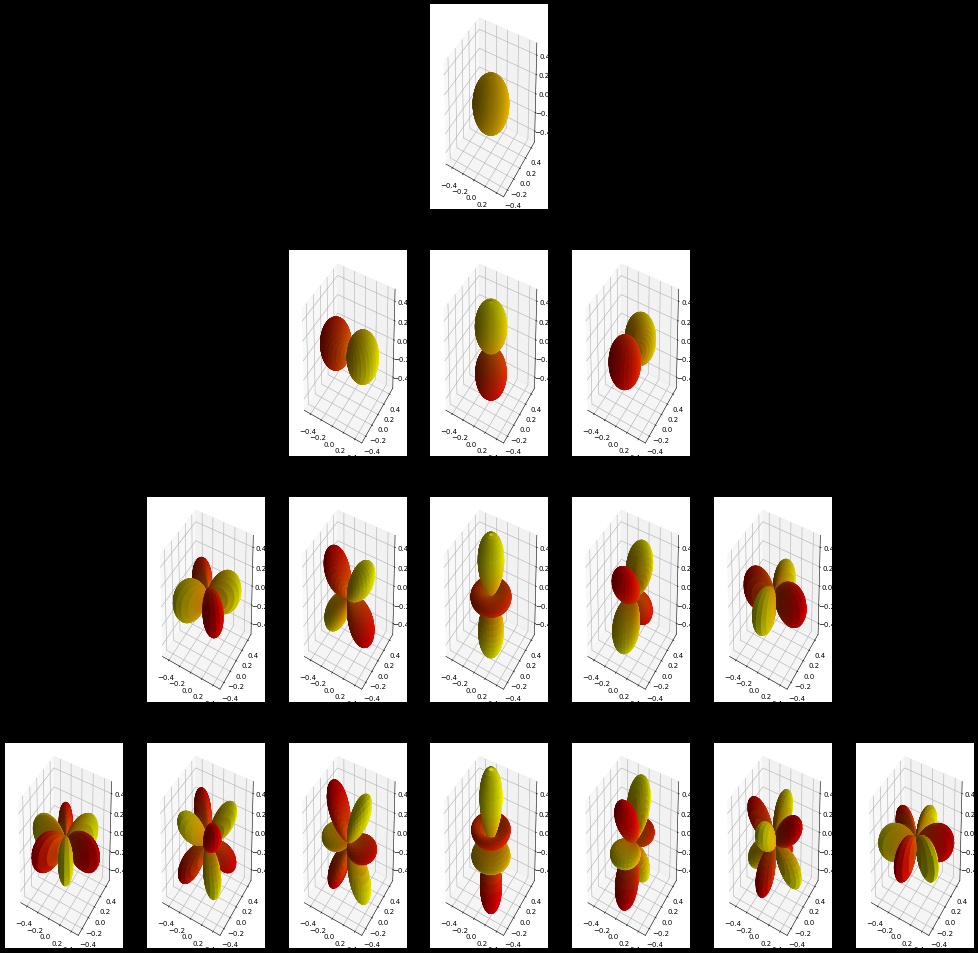

In [14]:
import matplotlib.gridspec as gridspec

lmax = 3

fig= plt.figure(figsize=(25,25), dpi=50,facecolor='k')
grid= gridspec.GridSpec(ncols=2*lmax+1, nrows=lmax+1, figure=fig)               #defines a grid with 2l+1 colms and lmax rows

for l in range(lmax+1):
    for m in range(-l, l+1):
        ax= fig.add_subplot(grid[l,m+lmax], projection='3d')
        plotY(ax,l,m,xyz)

plt.show()

<br><br><br><br><br><br><br>

# **<font face=Georgia color=330066>📗 Section 4::</font><font face=Garamond color=00CC66> Total Wavefunction</font>**
<br>


**program:: 7 Definition of Total wavefuntion of H-atom**

---

In [16]:
from math import factorial
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm, genlaguerre

def h(n,l,m,X,Y,Z):

  #conversion to polar coordinates
  r = np.sqrt(X**2+Y**2+Z**2)
  theta = np.arccos(Z/r)
  phi = np.arctan(Y/X)

  #defintion of spherical harmonic part
  s=sph_harm(m,l,phi,theta)

  #definition of radial part
  rho = 2.*r/n
  lp= genlaguerre(n-l-1,2*l+1)(rho)
  N= np.sqrt(((2./n)**3)*(factorial(n-l-1)/(2*n*factorial(n+l))))

  #combination of all the parts
  f= N*np.exp(-rho/2.)*(rho**l)*lp*s
  f= np.nan_to_num(f)                                                           #nan_to_num replaces None values if any with numbers
  return f


**Program 8:: Contour Plot of total Wavefunction**

---

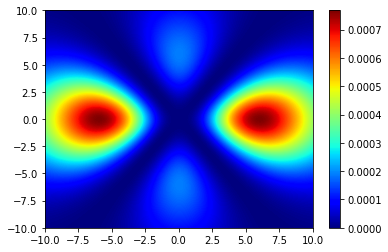

In [19]:
#definition of cartetian coordinates
d=0.05
min=-10                                                                         #scale must be changed in accord with the wavefunction
max=10

x= np.arange(min,max,d)
y= np.arange(min,max,d)
z= np.arange(min,max,d)
X,Y,Z= np.meshgrid(x,y,z)                                                       #definition of meshgrid for contour plot 

n,l,m=3,2,0                                                                    #change these quantum numbers to visualize different orbitals

psi= h(n,l,m,X,Y,Z)                                                             #wavefunction
psi2= abs(psi)**2                                                               #probability function


plt.imshow(psi2[int((0-min)/d),:,:],extent=[min,max,min,max], cmap="jet",aspect='auto')       #contour plot of wavefunction 
plt.colorbar()

---
# **<font face=Georgia color=330066>📗 Future of the project ::</font>**

<font face="georgia">We have tried to generate the results for hydrogen atom which are given in standard chemistry textbooks. In future, we want to determine the mean and most probable radius of radial distribution function, they are very important quantites if we want to compare two orbitals. Other suggestions or constructive critism is wholeheartedly welcomed by every member of these group.</font>

<br>

# **<center><font face=Georgia color=330066>-:Acknowledgement:-</center>**

**<center><font face="Georgia" size='4'>A teacher can never know where his influence will stop. We, here by sincerly acknowledge our teacher and guide Prof.Sabyasachi Misra who introduce us to the world of computational chemistry.</font></center>**

**<font size=4>Sources refered::**

1. D.A McQuire, Quantam Chemistry
2. J. VanderPlas, Python Data Science Handbook
3. https://docs.scipy.org/doc/scipy/reference/special.html
3. https://matplotlib.org/stable/gallery/index.html
4. https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root_scalar.html

# **<font face=Georgia color=330066>Link to the Colab Sheet :</font>** 
https://colab.research.google.com/drive/1bYeqaw4u4gn3pYs-8MhvPOccsdNXH-S8?usp=sharing